In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
univ = pd.read_csv('../Clustering/Universities.csv',index_col='Univ')
univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


In [3]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Brown to Yale
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SAT       25 non-null     int64
 1   Top10     25 non-null     int64
 2   Accept    25 non-null     int64
 3   SFRatio   25 non-null     int64
 4   Expenses  25 non-null     int64
 5   GradRate  25 non-null     int64
dtypes: int64(6)
memory usage: 1.4+ KB


### Standardise the data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(univ)

### How to build the Model

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=2)

In [8]:
model.fit(scaled_data)

KMeans(n_clusters=2)

In [9]:
# the wcss value for the model
model.inertia_

64.1452839501027

### Hyperparam tunning

In [10]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[150.0,
 64.1452839501027,
 44.762208522076165,
 33.654341806512235,
 28.499664954585903,
 22.452524599848374,
 19.074267975368713,
 16.323900179494814,
 13.305000114341166,
 10.943687005342085]

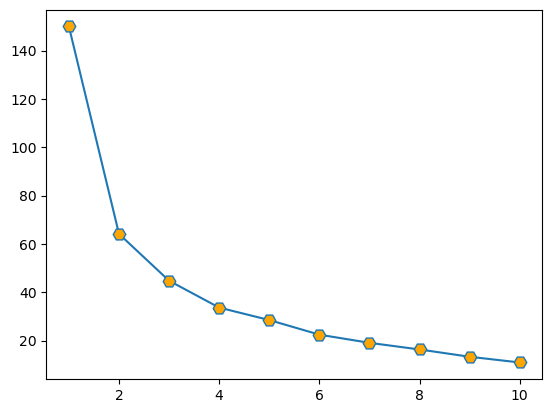

In [12]:
### Elbow plot
plt.plot(range(1,11),wcss,marker='H',markersize=9,
        markerfacecolor='orange')
plt.show()

In [13]:
final_model = KMeans(n_clusters=3)
final_model.fit(scaled_data)

KMeans(n_clusters=3)

In [14]:
final_model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [15]:
univ['Label']=final_model.labels_
univ

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Label
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0
Dartmouth,1340,89,23,10,32162,95,2
Duke,1315,90,30,12,31585,95,2
Georgetown,1255,74,24,12,20126,92,0
Harvard,1400,91,14,11,39525,97,2


In [16]:
grp = univ.groupby('Label')
grp

In [18]:
for x,y in grp:
    print(y)
    print('-'*60)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Label
Univ                                                                 
Brown         1310     89      22       13     22704        94      0
CMU           1260     62      59        9     25026        72      0
Columbia      1310     76      24       12     31510        88      0
Cornell       1280     83      33       13     21864        90      0
Georgetown    1255     74      24       12     20126        92      0
Northwestern  1260     85      39       11     28052        89      0
NotreDame     1255     81      42       13     15122        94      0
UCBerkeley    1240     95      40       17     15140        78      0
UChicago      1290     75      50       13     38380        87      0
UMichigan     1180     65      68       16     15470        85      0
UPenn         1285     80      36       11     27553        90      0
UVA           1225     77      44       14     13349        92      0
--------------------

In [19]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Label,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
